Lists Vs Tuple Vs Set Vs Dictionary

In [ ]:
# List: Ordered, Mutable, allows duplicates, indexing, slicing
# Tuple: Ordered, Immutable, allows duplicates, indexing, slicing, slightly faster than lists
# Set: Unordered, mutable, only unique elements, no indexing, fast membership check - hashing
# Dict: Unordered, mutable, key-val pairs, keys must be unique hashable

In [27]:
import matplotlib.pyplot as plt
import timeit
import sys

Retrieval Methods

In [8]:
# list
my_list = [10, 20, 30, 40]

# Indexing
print(my_list[2])

# Membership check
print(20 in my_list)

# Iteration
for element in my_list:
    print(element)

30
True
10
20
30
40


In [6]:
# Tuple
my_tuple = (10, 20, 30, 40)

# Indexing
print(my_tuple[2]) 

# Membership check
print(20 in my_tuple)

# Iteration
for element in my_tuple:
    print(element)


30
True
10
20
30
40


In [7]:
# Set
my_set = {10, 20, 30, 40}

# Membership check
print(20 in my_set) 

# Iteration
for element in my_set:
    print(element)

True
40
10
20
30


In [9]:
# Dictionary
my_dict = {"a": 10, "b": 20, "c": 30}

# Key-Based 
print(my_dict["b"])

# Membership check
print("b" in my_dict) 

# Iteration
for key in my_dict:
    print(f"Key: {key}, Value: {my_dict[key]}")

20
True
Key: a, Value: 10
Key: b, Value: 20
Key: c, Value: 30


Memory Comparison

In [ ]:
# Create example data
data = [i for i in range(1_000_000)]  # Large data set for testing
data_tuple = tuple(data)
data_set = set(data)
data_dict = {i: None for i in data}

print("Memory Usage:")
print(f"List: {sys.getsizeof(data)} bytes")
print(f"Tuple: {sys.getsizeof(data_tuple)} bytes")
print(f"Set: {sys.getsizeof(data_set)} bytes")
print(f"Dictionary: {sys.getsizeof(data_dict)} bytes")

Memory Usage:
List: 8448728 bytes
Tuple: 8000040 bytes
Set: 33554648 bytes
Dictionary: 41943136 bytes


<BarContainer object of 4 artists>

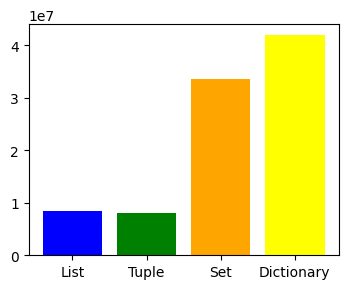

In [34]:
# Plotting the results
labels = ['List', 'Tuple', 'Set', 'Dictionary']
times = [sys.getsizeof(data), sys.getsizeof(data_tuple), sys.getsizeof(data_set), sys.getsizeof(data_dict)]

# Creating the bar plot
plt.figure(figsize=(4, 3))
plt.bar(labels, times, color=['blue', 'green', 'orange', 'yellow'])

In [ ]:
# Observations
# Lists - Dynamic - allocate extra memory - buffer for future additions - hecnce extra memory than tuples
# Tuples - Immutable - no over allocations
# Set - uses hash table internally - enforce ujniqueness - hence extra memory than list & tuple
# Dict - Uses hash table - need to store both keys & vals - hence double memory

Search Comparison

In [15]:

list_time = timeit.timeit("999999 in data", globals=globals(), number=1000)
tuple_time = timeit.timeit("999999 in data_tuple", globals=globals(), number=1000)
set_time = timeit.timeit("999999 in data_set", globals=globals(), number=1000)
dict_time = timeit.timeit("999999 in data_dict", globals=globals(), number=1000)

print(f"List: {list_time}")
print(f"Tuple: {tuple_time}")
print(f"Set: {set_time}")
print(f"Dictionary: {dict_time}")

List: 4.686927042006573
Tuple: 4.335466500000621
Set: 2.5207998987752944e-05
Dictionary: 2.9958006052765995e-05


<BarContainer object of 4 artists>

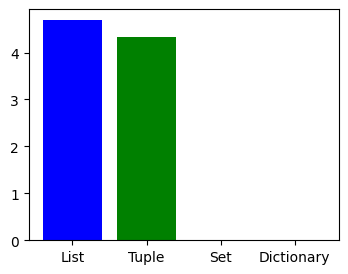

In [33]:
# Plotting the results
labels = ['List', 'Tuple', 'Set', 'Dictionary']
times = [list_time, tuple_time, set_time, dict_time]

# Creating the bar plot
plt.figure(figsize=(4, 3))
plt.bar(labels, times, color=['blue', 'green', 'orange', 'yellow'])

In [14]:
# Lists & Tuple - O(n)
# Set & Dict - O(1)

Addition Time

In [ ]:
list_add_time = timeit.timeit("data.append(1000000)", setup="data = [i for i in range(1_000_000)]", number=1000)
set_add_time = timeit.timeit("data_set.add(1000000)", setup="data_set = set(i for i in range(1_000_000))", number=1000)
dict_add_time = timeit.timeit("data_dict[1000000] = None", setup="data_dict = {i: None for i in range(1_000_000)}", number=1000)

print(f"List: {list_add_time}")
print(f"Set: {set_add_time}")
print(f"Dictionary: {dict_add_time}")

List: 2.5290995836257935e-05
Set: 2.2583997633773834e-05
Dictionary: 1.5666002582293004e-05


<BarContainer object of 3 artists>

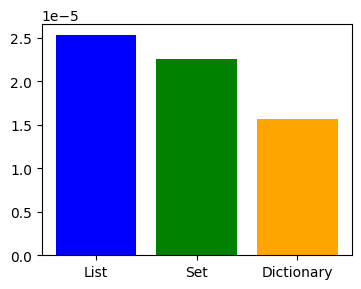

In [31]:
# Plotting the results
labels = ['List', 'Set', 'Dictionary']
times = [list_add_time, set_add_time, dict_add_time]

# Creating the bar plot
plt.figure(figsize=(4, 3))
plt.bar(labels, times, color=['blue', 'green', 'orange'])

Deletion time

In [21]:
list_del_time = timeit.timeit(
    "data = [i for i in range(1_000_000)]; data.remove(500000)",
    number=1
)

set_del_time = timeit.timeit(
    "data_set = set(i for i in range(1_000_000)); data_set.remove(500000)",
    number=1
)

dict_del_time = timeit.timeit(
    "data_dict = {i: None for i in range(1_000_000)}; del data_dict[500000]",
    number=1
)

print(f"List: {list_del_time}")
print(f"Set: {set_del_time}")
print(f"Dictionary: {dict_del_time}")

List: 0.07575524999992922
Set: 0.03458137500274461
Dictionary: 0.03127037500235019


<BarContainer object of 3 artists>

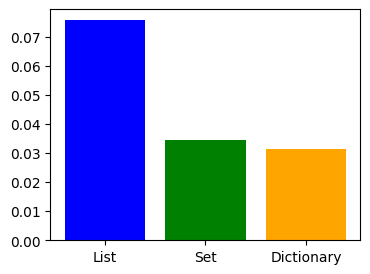

In [30]:
# Plotting the results
labels = ['List', 'Set', 'Dictionary']
times = [list_del_time, set_del_time, dict_del_time]

# Creating the bar plot
plt.figure(figsize=(4, 3))
plt.bar(labels, times, color=['blue', 'green', 'orange'])

In [ ]:
# Addition & Deletion
# Lists - O(n)
# Sets & Dict - O(1)